In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import math
import random
import time

·Interfaz par que se ejecute paso a paso o arroje directamente el arbol entero.
·Mostrar solo el grafo en azul
·Elimianr prints
·Terminar despliegues y requisitos de la tarea

Estas son las aristas: [(0, 4), (0, 5), (0, 6), (0, 15), (0, 23), (0, 25), (0, 29), (1, 2), (1, 4), (1, 13), (1, 14), (1, 20), (1, 22), (1, 23), (1, 28), (2, 5), (2, 7), (2, 13), (2, 18), (2, 22), (2, 23), (2, 26), (3, 5), (3, 6), (3, 8), (3, 9), (3, 10), (3, 18), (3, 20), (3, 25), (3, 26), (3, 27), (4, 5), (4, 6), (4, 7), (4, 10), (4, 12), (4, 14), (4, 15), (4, 16), (4, 17), (4, 20), (4, 21), (4, 24), (4, 26), (5, 12), (5, 14), (5, 15), (5, 16), (5, 17), (5, 18), (5, 19), (5, 20), (5, 24), (5, 26), (5, 28), (6, 8), (6, 11), (6, 12), (6, 15), (6, 18), (6, 21), (6, 22), (6, 23), (6, 25), (6, 27), (6, 29), (7, 10), (7, 11), (7, 13), (7, 15), (7, 17), (7, 24), (7, 25), (7, 26), (8, 9), (8, 10), (8, 13), (8, 14), (8, 17), (8, 18), (8, 19), (8, 23), (8, 26), (8, 29), (9, 10), (9, 14), (9, 15), (9, 21), (9, 23), (9, 25), (9, 28), (10, 11), (10, 12), (10, 13), (10, 16), (10, 18), (10, 24), (10, 25), (11, 12), (11, 13), (11, 15), (11, 21), (11, 24), (11, 27), (12, 14), (12, 15), (12, 16), (12,

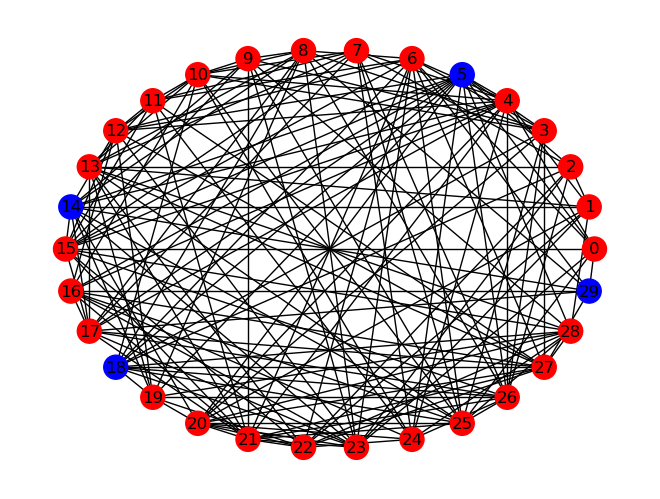

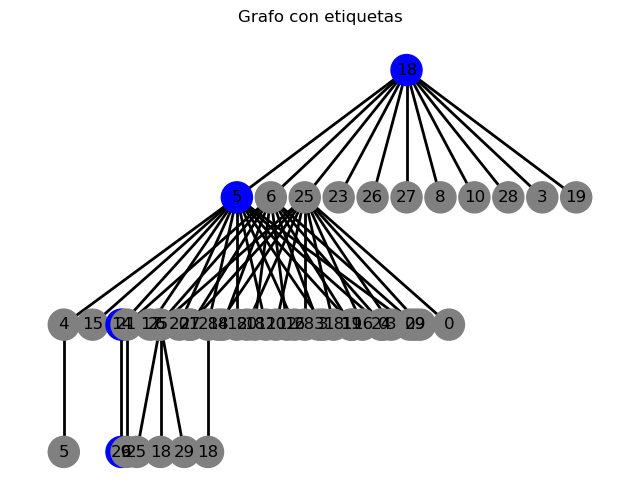

In [2]:
class archivo():
    def Leer(entrada): #lEER ARCHIVO PERMITE CREAR LAS RUTAS
        f=open(entrada,'r')
        aristas=[]  #Creamos lista donde se alcaenaran las conexiones de los nodos y los nodos iniciales del bombero y los incendios
        linea=f.readline() #Se leera acda linea del input, lo que permitira la revision de cada valor para que esten correctos
        #Condiciones para que el valor se correcto,no permitir letras, el valor que se encuentre solo es el bombero, por lo que debe existir si o si un valor solo.
        #El ultimo valor debe teenr al menos un numero, y este debe ser diferente al nuemro donde parte el bombero
        #Cada linea que represente un arco debe contener solo dos numeros. 
        #(EN REVISIÓN) Si un nodo no tiene conexiones, se asume que no existe, ejemplo si el nodo 5 no tiene conexiones, se toma en cuenta los nodos, 0,1,2,3,4,6,7,etc
        #El nodo del bombero debe tener conexion o sino seria imposible, al igual que los focos de incendio
        conexion=linea.split()
        conexion=[int(x) for x in conexion]
        conexion=tuple(conexion)
        aristas.append(conexion)
        while linea:
            linea=f.readline()
            conexion=linea.split()
            conexion=[int(x) for x in conexion]
            conexion=tuple(conexion)
            aristas.append(conexion)
        aristas.pop() #Elimina la ultima tupla que queda vacía
        f.close()
        return aristas
    
class estructuras():
    def edificio(data):
        e_habitaciones=dict() #Estado de las habitaciones
        aristas=data.copy()
        for arista in data:  #Recorremos cada arista almacenada en la data
            for vertice in arista:
                if vertice not in e_habitaciones:
                    e_habitaciones.update({vertice:(0,0)}) #Agrega al diccionario estado habitaciones la habitacion como clave y el valor (estado,está el bombero si o no)
        for i in data:
            if len(i)==1:   #Para la primera linea que tenga un único valor, se sabe que es donde parte el bombero
                e_habitaciones.update({i[0]:(1,1)})  #Se actualiza el estado de la habitaciones como defendido y que el bombero se encuentra ahí
                aristas.remove(i)
        for i in data[-1]: #En la tupla final, se sabe que se encuentran las habitaciones donde parte el incencio, por lo que se actualiza el estado de cada una a quemada
            e_habitaciones.update({i:(2,0)})

        aristas.pop()
        # Ordenar por claves EL ESTADO DE LAS habitaciones
        e_habitaciones = {clave: e_habitaciones [clave] for clave in sorted(e_habitaciones )}
        habitaciones=list(e_habitaciones.keys())
        return aristas,habitaciones,e_habitaciones
    
    def asignar_posiciones(n_lados,habitaciones):
        if n_lados < 3: #Si tiene mes de 3 habitaciones asigna posiciones una al lado de la otra
            figura={habitaciones[0]:(0,0),habitaciones[1]:(0,1)}
        else:
            figura = {} #Aqui se gaurdara las posiciones de la figura
            # Cálculo de los vértices
            for i in range(n_lados):
                # Ángulo de cada vértice en radianes
                angulo = 2 * math.pi * i / n_lados  #Segun el nuemro de lados se optiene un angulo
                # Según el angulo se generan coordenadas con los valores de seno y coseno, para poder ubicar las habitaciones
                x = round(math.cos(angulo), 2)
                y = round(math.sin(angulo), 2)
                figura[habitaciones[i]] = (x, y)
            return figura
        
    def grafo(aristas,habitaciones,e_habitaciones):
        #Establecemos las posiciones que tendra cada nodo
        posiciones=estructuras.asignar_posiciones(len(habitaciones),habitaciones) #Segun la cantidad de habitaciones generara posiciones para el grafo
        G=nx.Graph() #Creamos la estructura del grafo
        for i in habitaciones:
            G.add_node(i)
        for i in aristas:
            G.add_edge(i[0],i[1])
        adyacencia=nx.adjacency_matrix(G)
        #Aignamos colores para el estado de los nodos del grafo
        nodos_desprotegidos=[]
        nodos_protegidos=[]
        nodos_defendidos=[]
        nodos_quemados=[]
        for i in e_habitaciones:
            if e_habitaciones[i][0]==0:
                nodos_desprotegidos.append(i)
            if e_habitaciones[i][0]==1:
                nodos_defendidos.append(i)
            if e_habitaciones[i][0]==2:
                nodos_quemados.append(i)
            if e_habitaciones[i][0]==3:
                nodos_protegidos.append(i)
        colores = []
        for nodo in G.nodes():
            if nodo in nodos_desprotegidos:
                colores.append('grey')  # Nodos desprotegidos en rojo
            elif nodo in nodos_defendidos:
                colores.append('blue')  # Nodos defendidos en verde
            elif nodo in nodos_quemados:
                colores.append('red')  # Nodos quemados en negro
            elif nodo in nodos_protegidos:
                colores.append('lightblue')  # Nodos protegidos en azul

        adyacencia=adyacencia.todense()
        #nx.draw(G,pos=posiciones,with_labels=True,node_color=colores)
        #plt.show()
        return adyacencia
    def mostrar_grafo(aristas,habitaciones,e_habitaciones):
        posiciones=estructuras.asignar_posiciones(len(habitaciones),habitaciones) #Segun la cantidad de habitaciones generara posiciones para el grafo
        G=nx.Graph() #Creamos la estructura del grafo
        for i in habitaciones:
            G.add_node(i)
        for i in aristas:
            G.add_edge(i[0],i[1])
        #Aignamos colores para el estado de los nodos del grafo
        nodos_desprotegidos=[]
        nodos_protegidos=[]
        nodos_defendidos=[]
        nodos_quemados=[]
        for i in e_habitaciones:
            if e_habitaciones[i][0]==0:
                nodos_desprotegidos.append(i)
            if e_habitaciones[i][0]==1:
                nodos_defendidos.append(i)
            if e_habitaciones[i][0]==2:
                nodos_quemados.append(i)
            if e_habitaciones[i][0]==3:
                nodos_protegidos.append(i)
        colores = []
        for nodo in G.nodes():
            if nodo in nodos_desprotegidos:
                colores.append('grey')  # Nodos desprotegidos en rojo
            elif nodo in nodos_defendidos:
                colores.append('blue')  # Nodos defendidos en verde
            elif nodo in nodos_quemados:
                colores.append('red')  # Nodos quemados en negro
            elif nodo in nodos_protegidos:
                colores.append('lightblue')  # Nodos protegidos en azul
        nx.draw(G,pos=posiciones,with_labels=True,node_color=colores)
        plt.show()

       
class estados():
    def contar(e_habitaciones):
        quemadas=0
        desprotegidas=0
        defendidas=0
        protegidas=0
        for i in e_habitaciones.values():
            if i[0]==0:
                desprotegidas=desprotegidas+1
            elif i[0]==1:
                defendidas=defendidas+1
            elif i[0]==2:
                quemadas=quemadas+1
            else:
                protegidas=protegidas+1

        return quemadas,desprotegidas,defendidas,protegidas


    def prioridad(adyacencia,e_habitaciones,nodo,tiempo): #Nodo es la posición en la que se encuentra el bombero
        prioridad=[] #Alamacenara los nodos adyacentes por orden de prioridad hacia el que se dirige
        for i in range(len(e_habitaciones)):
            if adyacencia[nodo][i]==1 and e_habitaciones[i][0]!=2:  #si es adyacente al bombero y la habitación está desprotegida, puede moverse para esa habitación
                suma_fila = np.sum(adyacencia[i, :])  #La suma de la fila de la matriz de adyacencia nos dice cuantas aristas tiene
                id=str(i)+str(suma_fila)+'_'+str(e_habitaciones[i][0])+str(tiempo)
                prioridad.append((i,suma_fila,e_habitaciones[i][0],tiempo,id))  #El valor de la tupla representa (nodo o etiqueta del nodo, cantidad de nodos adyacentes,estado de la habitacion,tiempo,id)
        prioridad = sorted(prioridad, key=lambda x: (-x[1], x[2])) #Ordena de manera descendente los pares (nodo,cantidad de nodos adyacentes,estado habitacion), por ende siendo el priemr valor el que mas nodos adyacentes tiene
        return prioridad
    
    def buscar_bombero(e_habitaciones):
        for i in e_habitaciones:
            if e_habitaciones[i][1]==1:#Si el bombero está aqui, debe proteger
                bombero=i
        return bombero
    
    def mover_bombero(e_habitaciones,mover,bombero):
        #Se mueve el bombero hacia i 
        e_habitaciones.update({bombero:(1,0)})  #Se actualiza donde estaba el bombero y se remplaza el valor para mostrar que ya no está ahi
        e_habitaciones.update({mover:(1,1)})  #Se protege el nodo y se actualiza la posición del bombero
        
    
    def quemar(adyacencia,e_habitaciones):
        quemar=[]
        for i in e_habitaciones:
            if e_habitaciones[i][0]==2: #Si es que la habitación se está quemando
                for j in e_habitaciones:  #recorremos por las habitaciones restantes apra ver si alguna es adyacente y ver si se quema
                    if adyacencia[i][j]==1 and e_habitaciones[j][0]==0:  #En caso de ser adyacentes y que la habitacion este desprotegida, se quema la habitación de al lado
                        quemar.append(j) #Agregamos los nodos que se van a quemar
        for i in quemar:
            e_habitaciones.update({i:(2,0)}) #Actualizamos los nodos quemados

        return e_habitaciones
    #Hacer funcioanr esto

    def proteger(adyacencia,e_habitaciones):
        simulacion=e_habitaciones.copy()
        for i in range(len(simulacion)):
            aux=estados.quemar(adyacencia,simulacion)
            simulacion=aux
        for i in simulacion:
            if simulacion[i][0]==0: #Si el nodo sigue sin quemarse despues de simular, entonces el nodo esta protegido.
                e_habitaciones.update({i:(3,0)}) #Se actualiza como protegido
                
        return e_habitaciones

class arbol():
    def crear(e_habitaciones):
        F=nx.Graph()
        bombero=estados.buscar_bombero(e_habitaciones)
        nodo_inicial=(bombero,'0000000')  #(Etiqueta,id)
        F.add_node(nodo_inicial[1],etiqueta=nodo_inicial[0])
        pos={nodo_inicial[1]:(0,0)} #El nodo donde parte el arbol es el (0,0)
        return F,pos

    def ramas(padre,prio,F,tiempo,pos,bombero,sol):
        n = len(prio)  # numero de ramas que se despliegan del padre

        c = pos[padre][0]  # Donde se encuentra el padre en el eje x
        
        d = 2-tiempo*0.3

        # Crear el intervalo con valores equidistantes para construir posiciones en eje x
        intervalo = np.linspace(c - d * (n // 2), c + d * (n // 2), n)
        aux=-1
        for i in prio:
            aux=aux+1
            id=i[4]+str(bombero)
            if not F.has_node(id): #Si es que el nodo no está en el arbol, se agrega
                F.add_node(id,etiqueta=i[0])
                pos.update({id:(intervalo[aux],-(tiempo+1))})
                F.add_edge(padre,id)
            elif F.has_node(id) and not F.has_edge(padre,id):
                if (padre,id)!=(id,id):  #Esto es para que no curran ciclos
                    F.add_node(id,etiqueta=i[0])
                    pos.update({id:(intervalo[aux],-(tiempo+1))})
                    F.add_edge(padre,id)
            #else:
                #print(f'El nodo {i[0]} si està en el arbol')
        # Lista para almacenar los colores de los nodos
        colores_nodos = []

        # Asignar colores según pertenencia a la lista nodos_de_interes
        for nodo in F.nodes():
            if nodo in sol:
                colores_nodos.append('blue')  # Color para nodos de interés
            else:
                colores_nodos.append('grey')  # Color para nodos que no están en la lista
        return colores_nodos
    
    def graficar(F,pos,colores_nodos):
        # Dibujar el grafo
        plt.figure(figsize=(8, 6))

        # Dibujar los nodos
        nx.draw_networkx_nodes(F, pos, node_size=500, node_color=colores_nodos)

        # Dibujar las aristas
        nx.draw_networkx_edges(F, pos, width=2)

        # Dibujar las etiquetas de los nodos (aquí mostramos las etiquetas y no los IDs)
        # Nota: `labels` es un diccionario que mapea nodos a sus respectivas etiquetas.
        labels = nx.get_node_attributes(F, "etiqueta")
        nx.draw_networkx_labels(F, pos, labels, font_size=12)

        # Mostrar la visualización
        plt.title("Grafo con etiquetas")
        plt.axis("off")  # Para ocultar los ejes
        plt.show()
        return F


class programa():
    def ejecutar(entrada,tiempo_limite):
        dat=archivo.Leer(entrada)
        aristas,habitaciones,e_habitaciones=estructuras.edificio(dat)


        print(f'Estas son las aristas: {aristas}\n')
        print(f'Estas son las habitaciones: {habitaciones}\n')
        print(f'Este es el estado de las habitaciones: {e_habitaciones}\n')


        r_recorrida=[]
        cota_sup=len(habitaciones) #La mejor solucion actual podria considerarse que es que se quemen todos los nodos, luego podemos ir actualizandola (El peor caso posible)
        adyacencia=estructuras.grafo(aristas,habitaciones,e_habitaciones)

        tree,pos=arbol.crear(e_habitaciones) #Creamos la estructura del arbol
        
        nodos_recorridos=0 #    Este será el valor que se encargara de contar cuantos nodos se exploran hasta terminar el problema

        inicio = time.time() #Marcamos el incio del tiempo para contar el tiempo que se demora en total

        optimal=True #En el caso que se eneucntre la solución optima, el valor será True.

        while True: #cambiamos de dirección la rama  
            simu=e_habitaciones.copy()
            t=0
            sol=['0000000']
            padre='0000000' #El ID del origen del arbol (Donde parte el bombero)
            
            bombero=estados.buscar_bombero(simu)
            aux=estados.prioridad(adyacencia,simu,bombero,t)
            aux2=0
            for x in aux:
                if x in r_recorrida:
                    aux2=aux2+1
            if aux2==len(aux) and aux2!=0 and t==0: #Significa que todas las ramas hijas del tiempo 0, es decir ya no queda nada mas que explorar
                break
            
            while True:  #Cada vez que recorra una rama completa
                bombero=estados.buscar_bombero(simu)
                aux=estados.prioridad(adyacencia,simu,bombero,t) #Lista de (nodo,cantidad de aristas, estado) donde se orden por prioridades
                
                aux2=0
                #Proceso para no recorrer ramas que ya fueron recorridas
                for x in aux:
                    if x in r_recorrida:
                        aux2=aux2+1
                if aux2==len(aux) and aux2!=0: #Significa que todas las ramas hiajs fueron recorridas, por lo que deb pasar a una rama hermana
                    cota_inf=10000 #En el caso que ocurra esto la cota inferior será 1000,ya que corta el problema antes que termine, por loque obviamnete hay menos quemados
                    break
                else:
                    prio=aux.copy() #Caso contrario nos quedamos con el valor de prio


                while prio[0] in r_recorrida:  #Revisamos si una rama ya feu recorrida, en acso de haberlo sido se elimina
                    prio.pop(0) 
                
                #Aqui comienza el proceso de simular el comportamiento de incendio atraves de la rama
                estados.mover_bombero(simu,prio[0][0],bombero)
                sol.append((prio[0][4]+str(bombero))) #Creamos la solución  (padre,hijo)
                estados.quemar(adyacencia,simu)
                estados.proteger(adyacencia,simu)

                nodos_recorridos=nodos_recorridos+1 

                #Contamos la cantidad de habitaciones quemadas
                cota_inf=0
                colores=arbol.ramas(padre,prio,tree,t,pos,bombero,sol)
                

                for i in simu.values():
                    if i[0]==2:  #Cuanto la cantidad de habitaciones quemadas
                        cota_inf=cota_inf+1 
                if cota_inf>cota_sup:
                    r_recorrida.append(prio[0]) #Eliminamos el valor de la rama para no recorrerla mas de inmediato, ya que empeora la solucion
                    break #Hago break,ya que la solucion ya es peor, por lo que no saco nada explorando aun más
                t=t+1
                temp=0 #Variable temporal que conatra la cantidad de nodos desprotegidos, en el mometno que no quede ningun nodo desprotegido se da termino al programa
                for i in simu.values():
                    if i[0]!=0:
                        temp=temp+1
                if temp==len(simu):
                    break
                padre=prio[0][4]+str(bombero)

            if cota_inf<cota_sup:
                print(f'Actualizamos la cota superior de {cota_sup} nodos quemados por la cota {cota_inf}  nodos quemados')
                print(f'Esta es la solución a la que actualizamos {sol}')
                mejor_solucion=sol #Actualizamos la mejor solución, guardando el paso a paso
                final=simu.copy()  #Guardamos su estado final
                cota_sup=cota_inf #Actualizamos la cota
                adyacencia=estructuras.grafo(aristas,habitaciones,simu)
                #arbol.graficar(tree,pos,colores)
            tiempo_transcurrido=time.time()-inicio #Tiempo en el que se ejeucta la acción
            if tiempo_transcurrido>= tiempo_limite:
                optimal=False  #En el caso que exceda el tiempo limite de ejecución cambiamos el valor de optimo a False, para clasificarlo como factible. Ya que al no ejecutar el algoritmo entero
                #No se puede garantizar que sea el optimo 
                break
            r_recorrida.append(prio[0]) #Guardamos el ultimo movimiento que haga el bombero hacia un nodo prioritario, para que no pueda volver a repetir dicho movimiento

        if optimal:
            print('\nSe encontro el valor optimo')
            print(f'La mejor solución es {mejor_solucion} con un valor de {cota_sup}')   
            print(f'Estos son los nodos recorridos para llegar a la solución optima {nodos_recorridos}') #Explica rcomo se conabilizarn y que se tomaron en cuenta todos los nodos recorridos para verificar que la solución es la optima
            print(f'El tiempo de ejecución fue de {tiempo_transcurrido} segundos')
            print(f'Este es el estado final de las habitaciones {final}')
            quemadas,desprotegidas,defendidas,protegidas=estados.contar(final)
            print('Estos son los estados finales:')
            print(f'Quemadas: {quemadas}')
            print(f'Desprotegidas: {desprotegidas}')
            print(f'Defendidas: {defendidas}')
            print(f'Protegidas: {protegidas}')
            colores=arbol.ramas(padre,prio,tree,t,pos,bombero,mejor_solucion)
            estructuras.mostrar_grafo(aristas,habitaciones,final)
            arbol.graficar(tree,pos,colores)
            
        else:
            #Corregir visualización del arbol cuando se detiene en un tiempo que no es tiempo esperado
            print('\nSe encontro un valor factible')
            print(f'La mejor solución es {mejor_solucion} con un valor de {cota_sup}')   
            print(f'Estos son los nodos recorridos para llegar a la solución {nodos_recorridos}')
            print(f'El tiempo de ejecución fue de {tiempo_transcurrido} segundos')
            colores=arbol.ramas(padre,prio,tree,t,pos,bombero,mejor_solucion)
            arbol.graficar(tree,pos,colores)
            

            
            
#Todo esto es fuera de clase
programa.ejecutar('input3.dat',20) #(Nombre del archivo, timepo maximo)



In [3]:
# Definir el número de puntos y el valor central
n = 1 # Número de puntos
c = 0  # Valor central

# Definir el paso (en este caso, la distancia de 1.5 entre los valores)
d = 1

# Crear el intervalo con valores equidistantes
intervalo = np.linspace(c - d * (n // 2), c + d * (n // 2), n)

# Mostrar el intervalo
print(intervalo)

[0.]


In [4]:
import random

class generar_instancias():
    def data(self, n):
        random.seed(11)
        aristas_set = set()  # Usamos un set para asegurarnos de que no haya duplicados
        
        g = open(f'input{n // 10}.dat', 'w')
        
        for i in range(n):
            for j in range(n):
                if i!=j:
                    arista = str(i) + ' ' + str(j)
                    if (i, j) not in aristas_set and (j, i) not in aristas_set:  # Verificamos si no está en el set
                        g.write(arista + '\n')
                        aristas_set.add((i, j))  # Agregamos la arista al set
        g.close()

    def eliminar_duplicados(self, file_name):
        # Leemos el archivo
        with open(file_name, 'r') as file:
            aristas = file.readlines()

        aristas_set = set()  # Set para evitar duplicados
        aristas_filtradas = []

        # Filtramos las aristas
        for arista in aristas:
            a, b = map(int, arista.strip().split())  # Convertimos las aristas a tuplas de enteros
            if (a, b) not in aristas_set and (b, a) not in aristas_set:
                aristas_filtradas.append(arista)
                aristas_set.add((a, b))
        
        # Sobrescribimos el archivo con las aristas filtradas
        with open(file_name, 'w') as file:
            file.writelines(aristas_filtradas)
    
    def contar_lineas_archivo(self,archivo):
        with open(archivo, 'r') as f:
            lineas = f.readlines()  # Leemos todas las líneas del archivo
        return len(lineas)  # Contamos el número de líneas
        
    def eliminar_lineas_aleatorias(self,file_name, num_lineas_a_eliminar):
        # Leer todas las líneas del archivo
        with open(file_name, 'r') as file:
            lineas = file.readlines()
        
        # Asegurarnos de no intentar eliminar más líneas de las que existen
        if num_lineas_a_eliminar > len(lineas):
            print("No se pueden eliminar más líneas de las que hay en el archivo.")
            return

        # Seleccionar índices aleatorios para eliminar
        indices_a_eliminar = random.sample(range(len(lineas)), num_lineas_a_eliminar)
        
        # Crear una nueva lista sin las líneas seleccionadas
        lineas_restantes = [
            linea for i, linea in enumerate(lineas) if i not in indices_a_eliminar
        ]

        # Sobrescribir el archivo con las líneas restantes
        with open(file_name, 'w') as file:
            file.writelines(lineas_restantes)

    def agregar_bombero_incendios(self,archivo,n):
        g=open(archivo,'a')
        bomber=random.randint(0,n-1) #Escojo donde poner al bombero
        bomber=str(bomber)
        g.write(bomber)
        aux=random.randint(1,n-1) #Escojo la cantidad de valores que seran foco de incendio 
        aux=random.randint(1,3)
        lista=[]
        for i in range(aux):
            j=random.randint(0,n-1)
            while j==bomber:
                j=random.randint(0,n-1)
            lista.append(j) #Agregamos valores a la lista
        lista=set(lista)
        lista=list(lista)
        fire=''
        print(f'Aqui estoy imprimiendo una lista {lista}')
        g.write('\n')
        for i in lista:
            fire=fire+str(i)+' '
        g.write(fire)





# Crear instancia y generar archivo

n=30
generador = generar_instancias()
generador.data(n)

# Eliminar duplicados de las aristas (si es necesario después)
generador.eliminar_duplicados(f'input3.dat')
archivo='input3.dat'
E=generador.contar_lineas_archivo(archivo)

#Si son n nodos, entonces tengo que eliminar:
D = E / (n * (n - 1) / 2)

while D>0.4:
    generador.eliminar_lineas_aleatorias(archivo, 1)
    E=generador.contar_lineas_archivo(archivo)
    D = E / (n * (n - 1) / 2)

generador.contar_lineas_archivo(archivo)
generador.agregar_bombero_incendios(archivo,n)

Aqui estoy imprimiendo una lista [2]
